In [46]:
import matplotlib.pyplot as plt

# 손글씨 데이터 읽기
from sklearn import datasets
digits = datasets.load_digits()

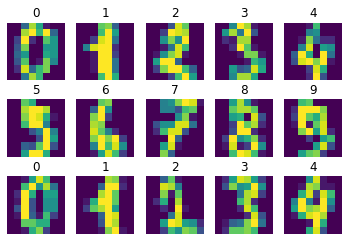

In [49]:
# 15 개만 출력 해보기
for i in range(15):
    # 3행 X 5열의 판에 순서대로 배치
    plt.subplot(3, 5, i+1)
    plt.axis("off")
    plt.title(str(digits.target[i]))
    plt.imshow(digits.images[i], cmap="gray")

1797


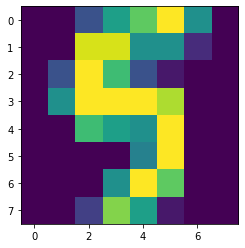

[[ 0.  0.  4.  9. 12. 16.  8.  0.]
 [ 0.  0. 15. 15.  8.  8.  2.  0.]
 [ 0.  4. 16. 11.  4.  1.  0.  0.]
 [ 0.  8. 16. 16. 16. 14.  0.  0.]
 [ 0.  0. 11.  9.  8. 16.  0.  0.]
 [ 0.  0.  0.  0.  7. 16.  0.  0.]
 [ 0.  0.  0.  8. 16. 12.  0.  0.]
 [ 0.  0.  3. 13.  9.  1.  0.  0.]]


In [69]:
# 이미지 형식
print(len(digits.images))
d0 = digits.images[1700]
plt.imshow(d0)
plt.show()
print(d0)

# 이미지 머신러닝하기
## 위에 형식을 보면 이미지 데이터도 연속된 숫자 데이터일뿐이다.
## 8X8 픽셀이라면 64개의 숫자 배열데이터라고 보면 됨.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score

# 데이터 읽기
digits = datasets.load_digits()
x = digits.images
y = digits.target
x = x.reshape((-1, 64)) # 2차원 배열을 1차원 배열로 변환하기

In [35]:
# 데이터를 학습 전용과 테스트 전용으로 분리하기
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# 데이터 학습하기
clf = svm.LinearSVC(dual=False)
clf.fit(x_train, y_train)

# 예측하고 정답률 출력하기
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9472222222222222


# 학습한 데이터 저장하기
## joblib모듈을 사용한다.

In [55]:
# 학습한 데이터 저장하기
import joblib
joblib.dump(clf, "digits.pkl")

['digits.pkl']

In [56]:
#학습한 데이터 읽기
clf = joblib.load("digits.pkl")

In [57]:
# 내가 작성한 이미지 판별하기
import cv2
import joblib

In [70]:
def predict_digit(filename):
    #학습한 데이터 읽어오기
    clf = joblib.load("digits.pkl")
    #직접 그린 손글씨 이미지 읽어오기
    my_img = cv2.imread(filename)
    # 이미지를 학습에 적합하게 변환하기
    my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
    my_img = cv2.resize(my_img, (8, 8))
    my_img = 15 - my_img // 16 # 흑백 반전
    # 2차원 배열을 1차원 배열로 변환
    my_img = my_img.reshape((-1, 64))
    #데이터 예측하기
    res = clf.predict(my_img)
    return res[0]

In [71]:
# 이미지 파일을 지정해서 실행하기
n = predict_digit("2.png")
print(n)
n = predict_digit("4.png")
print(n)
n = predict_digit("5.png")
print(n)

4
4
6
